In [3]:
import pandas as pd
import numpy as np

In [4]:
import openpyxl

In [5]:
import os
import glob
import pandas as pd

folder_path = "../data/OPERATORE_B_Voi"

# 1) گرفتن همه فایل‌های Excel
files = glob.glob(os.path.join(folder_path, "*.xlsx"))

# 2) حذف فایل‌های موقتی اکسل (~$)
files = [f for f in files if not os.path.basename(f).startswith("~$")]

df_list = []
bad_files = []

for file in files:
    try:
        df = pd.read_excel(file, engine="openpyxl")
        df["source_file"] = os.path.basename(file)
        df_list.append(df)
    except Exception as e:
        print(f"❌ Error reading {os.path.basename(file)}")
        print(e)
        bad_files.append(file)

voi_df = pd.concat(df_list, ignore_index=True)

print("✅ Loaded files:", len(df_list))
print("⚠️ Problematic files:", len(bad_files))


✅ Loaded files: 22
⚠️ Problematic files: 0


In [6]:

voi_df.columns


Index(['Identificativo noleggio', 'Targa veicolo', 'Data inizio corsa',
       'Data fine corsa', 'Lat inizio corsa_coordinate',
       'Lon inizio corsa_coordinate', 'Lat fine corsa_coordinate',
       'Lon fine corsa_coordinate', 'Tempo Tot', 'KM Tot', 'Prenotazione',
       'Batteria inizio', 'Batteria fine', 'source_file'],
      dtype='str')

In [7]:

voi_df.shape

(291765, 14)

In [8]:
voi_df["source_file"].value_counts()


source_file
DATINOLEGGI_202506.xlsx                    20466
DATINOLEGGI_202507.xlsx                    19325
DATINOLEGGI_202505.xlsx                    18399
DATINOLEGGI_202509.xlsx                    18104
DATINOLEGGI_202410.xlsx                    18026
DATINOLEGGI_202411.xlsx                    18010
DATINOLEGGI_202510.xlsx                    17222
DATINOLEGGI_202504.xlsx                    17075
DATINOLEGGI_202409.xlsx                    15744
DATINOLEGGI_Operator B(Voi)_202503.xlsx    14863
DATINOLEGGI_202412.xlsx                    14498
DATINOLEGGI_202508.xlsx                    12633
DATINOLEGGI_202407.xlsx                    12412
DATINOLEGGI_202502.xlsx                    12386
DATINOLEGGI_202501.xlsx                    10523
DATINOLEGGI_202406.xlsx                     9492
DATINOLEGGI_202408.xlsx                     8695
DATINOLEGGI_202405.xlsx                     8608
DATINOLEGGI_202404.xlsx                     7947
DATINOLEGGI_202401.xlsx                     6126
DATINOLE

In [9]:
voi_df.dtypes

Identificativo noleggio            str
Targa veicolo                      str
Data inizio corsa                int64
Data fine corsa                  int64
Lat inizio corsa_coordinate    float64
Lon inizio corsa_coordinate    float64
Lat fine corsa_coordinate      float64
Lon fine corsa_coordinate      float64
Tempo Tot                      float64
KM Tot                         float64
Prenotazione                       str
Batteria inizio                float64
Batteria fine                  float64
source_file                        str
dtype: object

In [10]:
voi_df[["Data inizio corsa", "Data fine corsa"]].head()


,Data inizio corsa,Data fine corsa
0,20241031225926,20241031230119
1,20241031225143,20241031225910
2,20241031225143,20241031225910
3,20241031225008,20241031230401
4,20241031224752,20241031230358


In [11]:
voi_df["Data inizio corsa"].describe()


count    2.917650e+05
mean     2.024620e+13
std      4.885212e+09
min      2.023120e+13
25%      2.024092e+13
50%      2.025021e+13
75%      2.025062e+13
max      2.025103e+13
Name: Data inizio corsa, dtype: float64

In [12]:
voi_df["Data inizio corsa"] = pd.to_datetime(
    voi_df["Data inizio corsa"].astype(str),
    format="%Y%m%d%H%M%S",
    errors="coerce"
)

voi_df["Data fine corsa"] = pd.to_datetime(
    voi_df["Data fine corsa"].astype(str),
    format="%Y%m%d%H%M%S",
    errors="coerce"
)


In [13]:
voi_df[["Data inizio corsa", "Data fine corsa"]].head()
voi_df.dtypes


Identificativo noleggio                   str
Targa veicolo                             str
Data inizio corsa              datetime64[us]
Data fine corsa                datetime64[us]
Lat inizio corsa_coordinate           float64
Lon inizio corsa_coordinate           float64
Lat fine corsa_coordinate             float64
Lon fine corsa_coordinate             float64
Tempo Tot                             float64
KM Tot                                float64
Prenotazione                              str
Batteria inizio                       float64
Batteria fine                         float64
source_file                               str
dtype: object

In [14]:
voi_df["Data inizio corsa"].head()

0   2024-10-31 22:59:26
1   2024-10-31 22:51:43
2   2024-10-31 22:51:43
3   2024-10-31 22:50:08
4   2024-10-31 22:47:52
Name: Data inizio corsa, dtype: datetime64[us]

In [15]:
voi_df["start_hour"] = voi_df["Data inizio corsa"].dt.hour
voi_df["start_date"] = voi_df["Data inizio corsa"].dt.date
voi_df["weekday"] = voi_df["Data inizio corsa"].dt.weekday
voi_df["is_weekend"] = voi_df["weekday"].isin([5, 6])
voi_df.head()

,Identificativo noleggio,Targa veicolo,Data inizio corsa,Data fine corsa,Lat inizio corsa_coordinate,Lon inizio corsa_coordinate,Lat fine corsa_coordinate,Lon fine corsa_coordinate,Tempo Tot,KM Tot,Prenotazione,Batteria inizio,Batteria fine,source_file,start_hour,start_date,weekday,is_weekend
0,6dd0c93b-4557-4e8d-8f98-a543f24a761d,besc,2024-10-31 22:59:26,2024-10-31 23:01:19,45.043269,7.671645,45.048233,7.673718,1.883333,0.575464,No,57.0,55.0,DATINOLEGGI_202410.xlsx,22.0,2024-10-31,3.0,False
1,201d1181-ad9a-4722-8754-280166181dbe,j2b6,2024-10-31 22:51:43,2024-10-31 22:59:10,45.074264,7.694650,45.086248,7.704112,7.450000,1.525659,Sì,94.0,92.0,DATINOLEGGI_202410.xlsx,22.0,2024-10-31,3.0,False
2,201d1181-ad9a-4722-8754-280166181dbe,j2b6,2024-10-31 22:51:43,2024-10-31 22:59:10,45.074264,7.694650,45.086248,7.704112,7.450000,1.525659,Sì,94.0,92.0,DATINOLEGGI_202410.xlsx,22.0,2024-10-31,3.0,False
3,9ac9534b-b86a-4c78-b5b0-39c9e3171227,yvld,2024-10-31 22:50:08,2024-10-31 23:04:01,45.076192,7.696033,45.086265,7.704420,13.883333,1.299232,Sì,87.0,79.0,DATINOLEGGI_202410.xlsx,22.0,2024-10-31,3.0,False
4,d1caf896-84d3-4cb6-9d4a-03e538658dcc,9qxg,2024-10-31 22:47:52,2024-10-31 23:03:58,45.074614,7.614285,45.058371,7.658567,16.100000,3.918786,Sì,85.0,76.0,DATINOLEGGI_202410.xlsx,22.0,2024-10-31,3.0,False


In [16]:
voi_df[["Data inizio corsa", "Data fine corsa"]].isna().sum()


Data inizio corsa    6126
Data fine corsa      6126
dtype: int64

In [17]:
voi_df[voi_df["source_file"] == "DATINOLEGGI_202401.xlsx"][
    ["Data inizio corsa", "Data fine corsa"]
]


,Data inizio corsa,Data fine corsa
118138,NaT,NaT
118139,NaT,NaT
118140,NaT,NaT
118141,NaT,NaT
118142,NaT,NaT
...,...,...
124259,NaT,NaT
124260,NaT,NaT
124261,NaT,NaT
124262,NaT,NaT


In [18]:
voi_df[voi_df["Tempo Tot"] <= 0].shape


(31, 18)

In [19]:
voi_df[voi_df["Tempo Tot"] <= 0]

,Identificativo noleggio,Targa veicolo,Data inizio corsa,Data fine corsa,Lat inizio corsa_coordinate,Lon inizio corsa_coordinate,Lat fine corsa_coordinate,Lon fine corsa_coordinate,Tempo Tot,KM Tot,Prenotazione,Batteria inizio,Batteria fine,source_file,start_hour,start_date,weekday,is_weekend
14573,c742c48d-a1d0-4597-bf9c-4943ca40d98b,39dk,2024-10-07 08:39:15,2024-10-07 08:39:15,45.063069,7.679071,45.063826,7.679258,0.0,0.085425,No,95.0,95.0,DATINOLEGGI_202410.xlsx,8.0,2024-10-07,0.0,False
58300,2265b80f-3b06-4434-902f-d7ecad6c0134,mzf9,2024-11-19 17:48:02,2024-11-19 17:48:02,45.063237,7.659786,45.063229,7.659755,0.0,0.002578,No,55.0,55.0,DATINOLEGGI_202411.xlsx,17.0,2024-11-19,1.0,False
61813,a6ed7d79-8f76-49c3-adba-7e649433d33f,sagu,2024-11-13 17:38:24,2024-11-13 17:38:24,45.043676,7.662797,45.043651,7.662819,0.0,0.003298,No,86.0,86.0,DATINOLEGGI_202411.xlsx,17.0,2024-11-13,2.0,False
68304,343015c5-8288-4b91-86d3-6501b905ca0b,atg8,2024-11-03 16:26:48,2024-11-03 16:26:48,45.073580,7.665464,45.073783,7.665594,0.0,0.024812,No,28.0,28.0,DATINOLEGGI_202411.xlsx,16.0,2024-11-03,6.0,True
91989,2241b4e9-1fd6-445d-ac1e-351ddf98703f,2x5y,2025-08-21 22:05:27,2025-08-21 22:05:27,45.047289,7.638491,45.047292,7.638277,0.0,0.016809,Sì,60.0,60.0,DATINOLEGGI_202508.xlsx,22.0,2025-08-21,3.0,False
94162,76f0b1f6-21fa-4d21-a5ea-a92f3cdaa36d,ns9z,2025-08-16 01:30:18,2025-08-16 01:30:18,45.078677,7.667338,45.078664,7.667366,0.0,0.002598,Sì,64.0,64.0,DATINOLEGGI_202508.xlsx,1.0,2025-08-16,5.0,True
100248,7607c70b-6a6f-40a5-8e38-696ec431b00f,6jpa,2025-09-30 16:38:36,2025-09-30 16:39:12,45.076827,7.649087,45.076827,7.649087,0.0,0.000000,No,NaN,NaN,DATINOLEGGI_202509.xlsx,16.0,2025-09-30,1.0,False
103240,06f36a57-53c0-493a-a1e2-8a8b19ca4f01,atun,2025-09-25 11:55:46,2025-09-25 11:55:46,45.061485,7.680313,45.061485,7.680313,0.0,0.000000,No,NaN,NaN,DATINOLEGGI_202509.xlsx,11.0,2025-09-25,3.0,False
103241,d80ecbc1-50e4-4469-9bc4-a641d72e3d5e,atun,2025-09-25 11:55:32,2025-09-25 11:55:33,45.061485,7.680313,45.061485,7.680313,0.0,0.000000,Sì,NaN,NaN,DATINOLEGGI_202509.xlsx,11.0,2025-09-25,3.0,False
103242,814586a8-503a-4b72-a6b3-3054b664e6cb,atun,2025-09-25 11:55:13,2025-09-25 11:55:13,45.061485,7.680313,45.061485,7.680313,0.0,0.000000,Sì,NaN,NaN,DATINOLEGGI_202509.xlsx,11.0,2025-09-25,3.0,False


In [20]:
voi_df[voi_df["KM Tot"] <= 0].shape


(247, 18)

In [21]:
voi_df[voi_df["KM Tot"] <= 0]

,Identificativo noleggio,Targa veicolo,Data inizio corsa,Data fine corsa,Lat inizio corsa_coordinate,Lon inizio corsa_coordinate,Lat fine corsa_coordinate,Lon fine corsa_coordinate,Tempo Tot,KM Tot,Prenotazione,Batteria inizio,Batteria fine,source_file,start_hour,start_date,weekday,is_weekend
30668,13686e42-7009-4fc1-96b0-26f197c1b83f,6jpa,2024-06-30 01:34:14,2024-06-30 01:34:18,45.041089,7.656859,45.041089,7.656859,0.066667,0.0,Sì,46.0,46.0,DATINOLEGGI_202406.xlsx,1.0,2024-06-30,6.0,True
30669,13686e42-7009-4fc1-96b0-26f197c1b83f,6jpa,2024-06-30 01:34:14,2024-06-30 01:34:18,45.041089,7.656859,45.041089,7.656859,0.066667,0.0,Sì,46.0,46.0,DATINOLEGGI_202406.xlsx,1.0,2024-06-30,6.0,True
30670,13686e42-7009-4fc1-96b0-26f197c1b83f,6jpa,2024-06-30 01:34:14,2024-06-30 01:34:18,45.041089,7.656859,45.041089,7.656859,0.066667,0.0,Sì,46.0,46.0,DATINOLEGGI_202406.xlsx,1.0,2024-06-30,6.0,True
32790,b4dda1b8-684d-4468-ab7c-990d2bacbf99,8l7j,2024-06-23 14:36:27,2024-06-23 14:36:29,45.080035,7.655743,45.080035,7.655743,0.033333,0.0,Sì,82.0,82.0,DATINOLEGGI_202406.xlsx,14.0,2024-06-23,6.0,True
32791,b4dda1b8-684d-4468-ab7c-990d2bacbf99,8l7j,2024-06-23 14:36:27,2024-06-23 14:36:29,45.080035,7.655743,45.080035,7.655743,0.033333,0.0,Sì,82.0,82.0,DATINOLEGGI_202406.xlsx,14.0,2024-06-23,6.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246183,5340319f-9bbb-446e-a163-00639716af69,5uan,2024-12-20 18:15:30,2024-12-20 18:15:32,45.090541,7.672440,45.090541,7.672440,0.033333,0.0,Sì,93.0,92.0,DATINOLEGGI_202412.xlsx,18.0,2024-12-20,4.0,False
255514,de021116-3eb7-46ce-914d-0e700ee11bcf,z7af,2024-12-03 17:12:36,2024-12-03 17:21:36,45.017559,7.610509,45.017559,7.610509,9.000000,0.0,No,29.0,29.0,DATINOLEGGI_202412.xlsx,17.0,2024-12-03,1.0,False
258222,7e587529-52b8-4c4d-b42d-f71df701e96b,tyge,2025-01-28 21:44:04,2025-01-28 21:44:29,45.072582,7.682089,45.072582,7.682089,0.416667,0.0,No,24.0,24.0,DATINOLEGGI_202501.xlsx,21.0,2025-01-28,1.0,False
259058,60def73d-a4fc-4448-a4c1-ea20e3ba6b6c,ze33,2025-01-26 18:20:49,2025-01-26 18:20:52,45.102082,7.669063,45.102082,7.669063,0.050000,0.0,Sì,100.0,100.0,DATINOLEGGI_202501.xlsx,18.0,2025-01-26,6.0,True


In [22]:
voi_df = voi_df[
    (voi_df["Tempo Tot"] > 0) &
    (voi_df["KM Tot"] > 0)
]


In [23]:
voi_df.shape

(291414, 18)

In [24]:
voi_df["duration_hours"] = voi_df["Tempo Tot"] / 60


In [25]:
voi_df["speed_kmh"] = voi_df["KM Tot"] / voi_df["duration_hours"]


In [26]:
voi_df[voi_df["speed_kmh"] > 30].shape


(260, 20)

In [27]:
# تعداد رکوردهای قبل از حذف
before_shape = voi_df.shape[0]

# حذف رکوردهای با سرعت غیرواقعی
voi_df = voi_df[voi_df["speed_kmh"] <= 30]

# تعداد رکوردهای بعد از حذف
after_shape = voi_df.shape[0]

removed = before_shape - after_shape

before_shape, after_shape, removed


(291414, 291154, 260)

In [28]:
reversed_time = voi_df[
    voi_df["Data inizio corsa"] > voi_df["Data fine corsa"]
]

reversed_time.shape


(0, 20)

In [29]:
same_location = voi_df[
    (voi_df["Lat inizio corsa_coordinate"] == voi_df["Lat fine corsa_coordinate"]) &
    (voi_df["Lon inizio corsa_coordinate"] == voi_df["Lon fine corsa_coordinate"])
]

same_location.shape


(0, 20)

In [30]:
voi_df[voi_df["Tempo Tot"] < 1].shape


(9032, 20)

In [31]:
voi_df[voi_df["Tempo Tot"] > 180].shape


(6, 20)

In [32]:
voi_df[voi_df["Tempo Tot"] > 180]


,Identificativo noleggio,Targa veicolo,Data inizio corsa,Data fine corsa,Lat inizio corsa_coordinate,Lon inizio corsa_coordinate,Lat fine corsa_coordinate,Lon fine corsa_coordinate,Tempo Tot,KM Tot,Prenotazione,Batteria inizio,Batteria fine,source_file,start_hour,start_date,weekday,is_weekend,duration_hours,speed_kmh
23671,86bf23e8-02df-4afe-8198-500f99ffd4a9,zbm2,2025-02-17 18:39:43,2025-02-17 22:29:46,45.048065,7.666615,45.049702,7.665862,230.050000,0.191387,Sì,98.0,6.0,DATINOLEGGI_202502.xlsx,18.0,2025-02-17,0.0,False,3.834167,0.049916
63736,143072ae-4afb-41c7-8516-0f3a6ad6bf84,ch5s,2024-11-10 18:30:54,2024-11-11 01:58:23,45.066228,7.682395,45.059971,7.697404,447.483333,1.368782,No,NaN,NaN,DATINOLEGGI_202411.xlsx,18.0,2024-11-10,6.0,True,7.458056,0.183531
149582,0c122460-619a-4d90-ba56-f3e96a7f3b3d,vf7u,2025-10-29 00:17:31,2025-10-29 07:10:46,45.053826,7.671507,45.052337,7.679470,413.250000,0.650000,No,49.0,45.0,DATINOLEGGI_202510.xlsx,0.0,2025-10-29,2.0,False,6.887500,0.094374
168208,c584313d-9945-495e-81a5-366b84fafa3c,t2l3,2025-06-27 00:06:15,2025-06-27 03:26:10,45.081767,7.673685,45.082334,7.672447,199.916667,0.115884,Sì,84.0,69.0,DATINOLEGGI_202506.xlsx,0.0,2025-06-27,4.0,False,3.331944,0.034780
251452,bf88283e-c08a-4af8-8092-a4c6aa0e76be,d5az,2024-12-11 12:22:33,2024-12-11 15:58:33,45.079409,7.685530,45.109419,7.660073,216.000000,3.889513,No,93.0,71.0,DATINOLEGGI_202412.xlsx,12.0,2024-12-11,2.0,False,3.600000,1.080420
283790,78a31c2b-ea47-44e5-8e9f-1b029a400d17,xaxb,2024-09-17 11:45:17,2024-09-17 15:24:36,45.108710,7.645079,45.106659,7.643230,219.316667,0.270354,No,100.0,66.0,DATINOLEGGI_202409.xlsx,11.0,2024-09-17,1.0,False,3.655278,0.073963


In [33]:
# حذف سفرهای با مدت زمان بیشتر از 180 دقیقه
voi_df = voi_df[voi_df["Tempo Tot"] <= 180]


In [34]:
# تعداد رکوردهای بعد از حذف
voi_df.shape


(291148, 20)

In [35]:
voi_df[voi_df["KM Tot"] > 15].shape


(0, 20)

In [36]:
voi_df[
    voi_df["Batteria fine"] > voi_df["Batteria inizio"]
].shape


(899, 20)

In [37]:
voi_df[
    (voi_df["KM Tot"] > 1) &
    ((voi_df["Batteria inizio"] - voi_df["Batteria fine"]) == 0)
].shape


(2146, 20)

In [38]:
voi_df.shape

(291148, 20)

In [39]:
initial_rows = 291_765
final_rows = 291_148
removed_rows = initial_rows - final_rows


In [40]:
removed_pct = removed_rows / initial_rows * 100
remaining_pct = final_rows / initial_rows * 100

removed_pct, remaining_pct


(0.21147156101657152, 99.78852843898342)

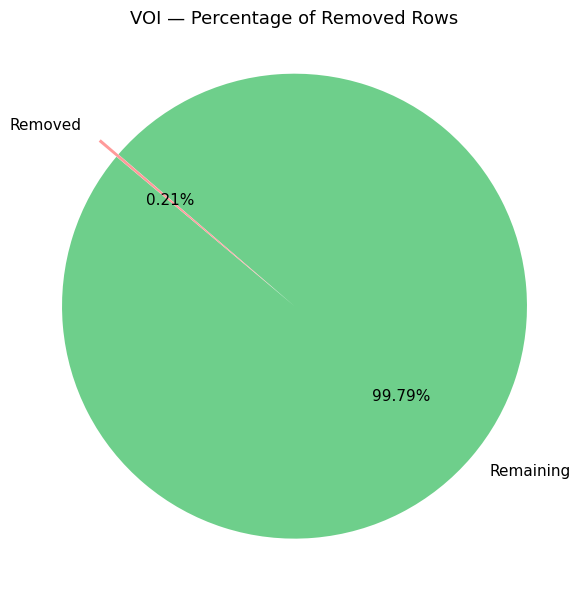

In [41]:
import matplotlib.pyplot as plt

labels = ["Remaining", "Removed"]
sizes = [remaining_pct, removed_pct]
colors = ["#6ECF8B", "#FF9A9A"]  # سبز / صورتی ملایم
explode = (0, 0.1)  # تاکید روی بخش حذف‌شده

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.2f%%",
    startangle=140,
    colors=colors,
    explode=explode,
    textprops={"fontsize": 11}
)

plt.title("VOI — Percentage of Removed Rows", fontsize=13)
plt.axis("equal")
plt.tight_layout()

plt.show()


In [42]:
# استخراج تاریخ روزانه
voi_df["trip_date"] = voi_df["Data inizio corsa"].dt.date

# تعداد سفرها در هر روز
daily_trips = (
    voi_df
    .groupby("trip_date")
    .size()
    .reset_index(name="num_trips")
)

daily_trips.head()


,trip_date,num_trips
0,2024-01-31,10
1,2024-02-01,226
2,2024-02-02,213
3,2024-02-03,330
4,2024-02-04,249


In [43]:
daily_trips.describe()


,num_trips
count,640.000000
mean,445.351562
std,185.277324
min,10.000000
25%,305.000000
50%,429.000000
75%,581.000000
max,1132.000000


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# اطمینان از datetime
voi_df["Data inizio corsa"] = pd.to_datetime(voi_df["Data inizio corsa"])

# استخراج تاریخ و سال
voi_df["trip_date"] = voi_df["Data inizio corsa"].dt.date
voi_df["year"] = voi_df["Data inizio corsa"].dt.year

# شمارش سفرهای روزانه
daily_trips = (
    voi_df
    .groupby(["trip_date", "year"])
    .size()
    .reset_index(name="num_trips")
)


In [45]:
daily_2024 = daily_trips[daily_trips["year"] == 2024]
daily_2025 = daily_trips[daily_trips["year"] == 2025]


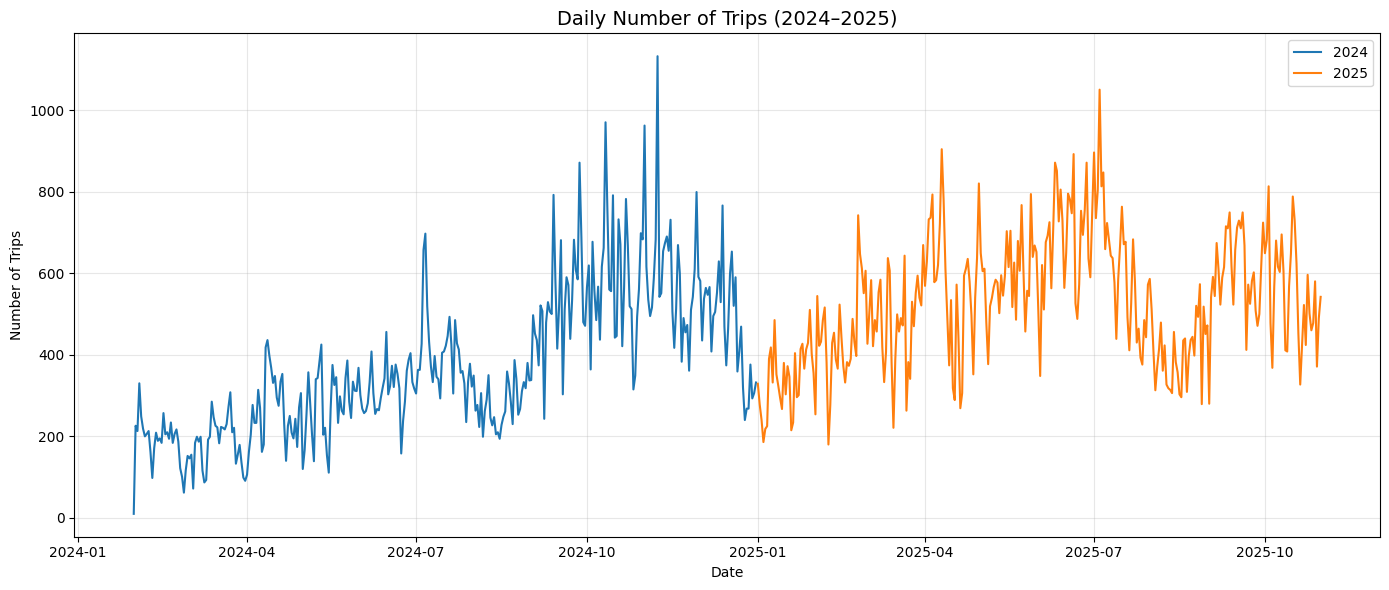

In [46]:
plt.figure(figsize=(14, 6))

plt.plot(
    daily_2024["trip_date"],
    daily_2024["num_trips"],
    label="2024",
    linewidth=1.5
)

plt.plot(
    daily_2025["trip_date"],
    daily_2025["num_trips"],
    label="2025",
    linewidth=1.5
)

plt.title("Daily Number of Trips (2024–2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# اطمینان از datetime بودن
voi_df["Data inizio corsa"] = pd.to_datetime(voi_df["Data inizio corsa"])

# استخراج ساعت و سال
voi_df["hour"] = voi_df["Data inizio corsa"].dt.hour
voi_df["year"] = voi_df["Data inizio corsa"].dt.year
voi_df["month"] = voi_df["Data inizio corsa"].dt.month



In [48]:
voi_hourly_df = voi_df[
    ~((voi_df["year"] == 2024) & (voi_df["month"] == 1))
]


In [49]:
hourly_2024 = (
    voi_hourly_df[voi_hourly_df["year"] == 2024]
    .groupby("hour")
    .size()
)

hourly_2025 = (
    voi_hourly_df[voi_hourly_df["year"] == 2025]
    .groupby("hour")
    .size()
)

# اطمینان از داشتن تمام ساعات 0 تا 23
hours = range(24)
hourly_2024 = hourly_2024.reindex(hours, fill_value=0)
hourly_2025 = hourly_2025.reindex(hours, fill_value=0)


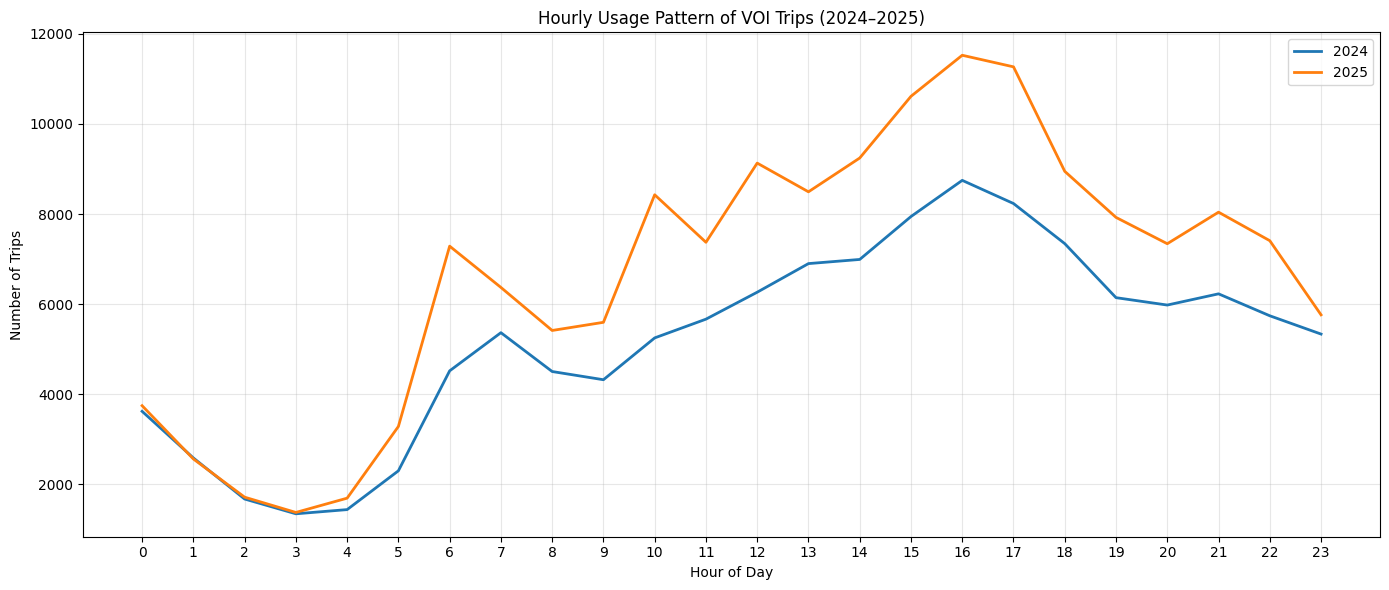

In [50]:
plt.figure(figsize=(14, 6))

plt.plot(hours, hourly_2024, label="2024", linewidth=2)
plt.plot(hours, hourly_2025, label="2025", linewidth=2)

plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Usage Pattern of VOI Trips (2024–2025)")

plt.xticks(hours)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


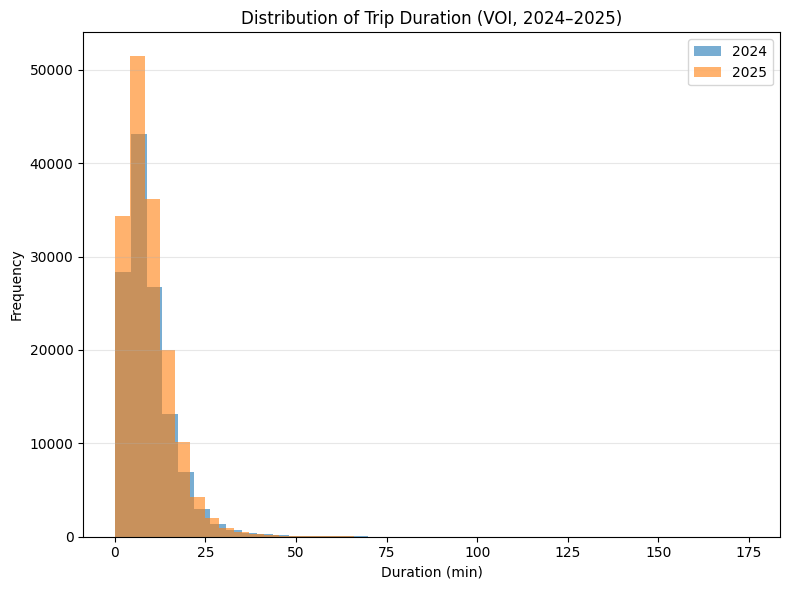

In [51]:
import matplotlib.pyplot as plt

# جدا کردن داده‌های 2024 و 2025
voi_2024 = voi_df[voi_df["Data inizio corsa"].dt.year == 2024]
voi_2025 = voi_df[voi_df["Data inizio corsa"].dt.year == 2025]

# محدود کردن بازه برای خوانایی (مثلاً تا 180 دقیقه، مطابق cleaning)
dur_2024 = voi_2024["Tempo Tot"]
dur_2025 = voi_2025["Tempo Tot"]

# رسم هیستوگرام
plt.figure(figsize=(8, 6))

plt.hist(
    dur_2024,
    bins=40,
    alpha=0.6,
    label="2024"
)

plt.hist(
    dur_2025,
    bins=40,
    alpha=0.6,
    label="2025"
)

plt.xlabel("Duration (min)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Duration (VOI, 2024–2025)")
plt.legend()
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


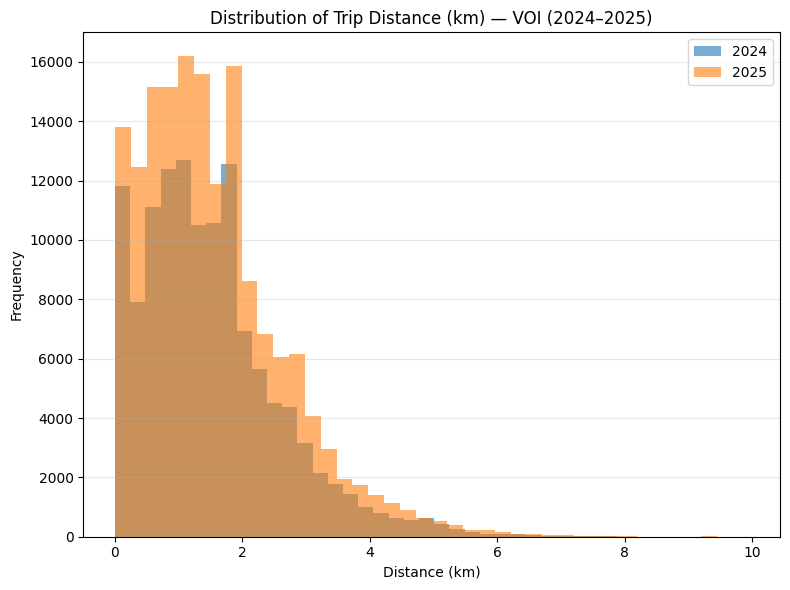

In [52]:
import matplotlib.pyplot as plt

# جدا کردن داده‌های 2024 و 2025
voi_2024 = voi_df[voi_df["Data inizio corsa"].dt.year == 2024]
voi_2025 = voi_df[voi_df["Data inizio corsa"].dt.year == 2025]

# فاصله‌ها (km)
dist_2024 = voi_2024["KM Tot"]
dist_2025 = voi_2025["KM Tot"]

# رسم هیستوگرام
plt.figure(figsize=(8, 6))

plt.hist(
    dist_2024,
    bins=40,
    alpha=0.6,
    label="2024"
)

plt.hist(
    dist_2025,
    bins=40,
    alpha=0.6,
    label="2025"
)

plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distance (km) — VOI (2024–2025)")
plt.legend()
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# کپی امن
df = voi_df.copy()

# حذف ژانویه 2024 از تحلیل ساعتی
df = df[~(
    (df["Data inizio corsa"].dt.year == 2024) &
    (df["Data inizio corsa"].dt.month == 1)
)]

# استخراج ساعت و روز هفته
df["hour"] = df["Data inizio corsa"].dt.hour
df["weekday"] = df["Data inizio corsa"].dt.weekday  # 0=Monday, 6=Sunday

# جدا کردن سال‌ها
df_2024 = df[df["Data inizio corsa"].dt.year == 2024]
df_2025 = df[df["Data inizio corsa"].dt.year == 2025]


In [54]:
heatmap_2024 = (
    df_2024
    .groupby(["weekday", "hour"])
    .size()
    .unstack(fill_value=0)
)

heatmap_2025 = (
    df_2025
    .groupby(["weekday", "hour"])
    .size()
    .unstack(fill_value=0)
)

# اطمینان از وجود همه ساعت‌ها
hours = list(range(24))
heatmap_2024 = heatmap_2024.reindex(columns=hours, fill_value=0)
heatmap_2025 = heatmap_2025.reindex(columns=hours, fill_value=0)


/var/folders/h0/khxnf7v151599zc19wcwyyfw0000gn/T/ipykernel_18770/3299684986.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


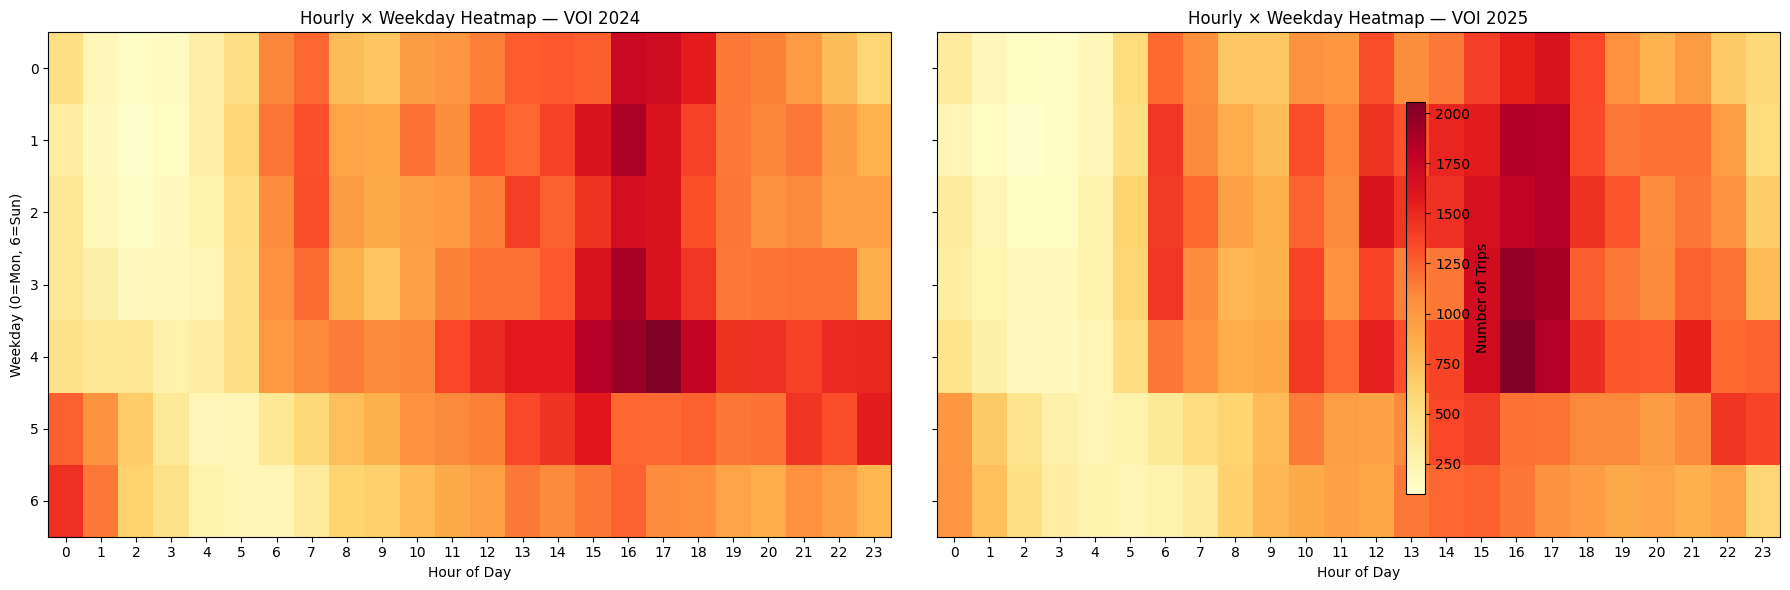

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Heatmap 2024
im1 = axes[0].imshow(
    heatmap_2024,
    aspect="auto",
    cmap="YlOrRd"
)
axes[0].set_title("Hourly × Weekday Heatmap — VOI 2024")
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("Weekday (0=Mon, 6=Sun)")
axes[0].set_xticks(range(24))
axes[0].set_yticks(range(7))

# Heatmap 2025
im2 = axes[1].imshow(
    heatmap_2025,
    aspect="auto",
    cmap="YlOrRd"
)
axes[1].set_title("Hourly × Weekday Heatmap — VOI 2025")
axes[1].set_xlabel("Hour of Day")
axes[1].set_xticks(range(24))

# Colorbar مشترک
cbar = fig.colorbar(im2, ax=axes.ravel().tolist(), shrink=0.85)
cbar.set_label("Number of Trips")

plt.tight_layout()
plt.show()


In [56]:
import folium
from folium.plugins import HeatMap
import pandas as pd


In [57]:
heat_df = voi_df[
    ["Lat inizio corsa_coordinate", "Lon inizio corsa_coordinate"]
].dropna()


In [58]:
heat_df = heat_df[
    (heat_df["Lat inizio corsa_coordinate"].between(44.9, 45.2)) &
    (heat_df["Lon inizio corsa_coordinate"].between(7.4, 7.9))
]


In [59]:
turin_center = [45.0703, 7.6869]

m = folium.Map(
    location=turin_center,
    zoom_start=12,
    tiles="CartoDB positron"
)


In [60]:
heat_data = heat_df.values.tolist()

HeatMap(
    heat_data,
    radius=20,        # اندازهٔ پخش
    blur=25,          # نرمی
    min_opacity=0.3,
    max_zoom=13
).add_to(m)


In [61]:
HeatMap(
    heat_data,
    radius=18,
    blur=30,
    min_opacity=0.25,
    max_zoom=13
).add_to(m)


In [62]:
m.save("voi_spatial_heatmap.html")


In [63]:
# ===============================
# VOI Route Intensity Map
# ===============================

import pandas as pd
import folium
from folium import PolyLine

# ------------------------------------------------
# 1. (اختیاری) Sample برای سبک‌تر شدن نقشه
# اگر دیتاست خیلی بزرگ است
# ------------------------------------------------
voi_sample = voi_df.sample(n=15000, random_state=42)
# اگر می‌خواهی کل داده استفاده شود:
# voi_sample = voi_df.copy()

# ------------------------------------------------
# 2. Center map on average start location (Turin)
# ------------------------------------------------
center_lat = voi_sample["Lat inizio corsa_coordinate"].mean()
center_lon = voi_sample["Lon inizio corsa_coordinate"].mean()

m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=12,
    tiles="cartodbpositron"
)

# ------------------------------------------------
# 3. Draw routes (start → end)
# ------------------------------------------------
for _, row in voi_sample.iterrows():
    try:
        PolyLine(
            locations=[
                (row["Lat inizio corsa_coordinate"], row["Lon inizio corsa_coordinate"]),
                (row["Lat fine corsa_coordinate"], row["Lon fine corsa_coordinate"])
            ],
            color="blue",
            weight=1,
            opacity=0.25
        ).add_to(m)
    except:
        continue

# ------------------------------------------------
# 4. Save interactive map
# ------------------------------------------------
output_file = "voi_route_intensity.html"
m.save(output_file)

output_file


'voi_route_intensity.html'

In [64]:
# ==========================================
# VOI Route Intensity Map — DualMap (2024 vs 2025)
# ==========================================

import pandas as pd
import folium
from folium import PolyLine
from folium.plugins import DualMap

# ------------------------------------------
# 1. Ensure datetime
# ------------------------------------------
voi_df["Data inizio corsa"] = pd.to_datetime(voi_df["Data inizio corsa"], errors="coerce")

# ------------------------------------------
# 2. Split data by year
# ------------------------------------------
voi_2024 = voi_df[voi_df["Data inizio corsa"].dt.year == 2024]
voi_2025 = voi_df[voi_df["Data inizio corsa"].dt.year == 2025]

# ------------------------------------------
# 3. (Optional) Sample for performance
# ------------------------------------------
voi_2024_sample = voi_2024.sample(n=min(15000, len(voi_2024)), random_state=42)
voi_2025_sample = voi_2025.sample(n=min(15000, len(voi_2025)), random_state=42)

# ------------------------------------------
# 4. Map center (Turin)
# ------------------------------------------
center_lat = voi_df["Lat inizio corsa_coordinate"].mean()
center_lon = voi_df["Lon inizio corsa_coordinate"].mean()

# ------------------------------------------
# 5. Create Dual Map
# ------------------------------------------
m = DualMap(
    location=[center_lat, center_lon],
    zoom_start=12,
    tiles="cartodbpositron"
)

# ------------------------------------------
# 6. Add 2024 routes (LEFT MAP)
# ------------------------------------------
for _, row in voi_2024_sample.iterrows():
    try:
        PolyLine(
            locations=[
                (row["Lat inizio corsa_coordinate"], row["Lon inizio corsa_coordinate"]),
                (row["Lat fine corsa_coordinate"], row["Lon fine corsa_coordinate"])
            ],
            color="blue",
            weight=1,
            opacity=0.25
        ).add_to(m.m1)
    except:
        continue

# ------------------------------------------
# 7. Add 2025 routes (RIGHT MAP)
# ------------------------------------------
for _, row in voi_2025_sample.iterrows():
    try:
        PolyLine(
            locations=[
                (row["Lat inizio corsa_coordinate"], row["Lon inizio corsa_coordinate"]),
                (row["Lat fine corsa_coordinate"], row["Lon fine corsa_coordinate"])
            ],
            color="red",
            weight=1,
            opacity=0.25
        ).add_to(m.m2)
    except:
        continue

# ------------------------------------------
# 8. Save map
# ------------------------------------------
output_file = "voi_route_intensity_2024_2025_dualmap.html"
m.save(output_file)

output_file


'voi_route_intensity_2024_2025_dualmap.html'

In [65]:
import folium
import pandas as pd

# -----------------------------
# 1. Select origin coordinates
# -----------------------------
origins = (
    voi_df
    .groupby(["Lat inizio corsa_coordinate", "Lon inizio corsa_coordinate"])
    .size()
    .reset_index(name="trip_count")
    .sort_values("trip_count", ascending=False)
)

# -----------------------------
# 2. Select top N origins
# -----------------------------
TOP_N = 20
top_origins = origins.head(TOP_N)

# -----------------------------
# 3. Create base map (Turin)
# -----------------------------
center_lat = voi_df["Lat inizio corsa_coordinate"].mean()
center_lon = voi_df["Lon inizio corsa_coordinate"].mean()

m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=12,
    tiles="cartodbpositron"
)

# -----------------------------
# 4. Add origin markers
# -----------------------------
for _, row in top_origins.iterrows():
    folium.CircleMarker(
        location=[row["Lat inizio corsa_coordinate"], row["Lon inizio corsa_coordinate"]],
        radius=5 + (row["trip_count"] / top_origins["trip_count"].max()) * 15,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6,
        popup=f"Trips started here: {row['trip_count']}"
    ).add_to(m)

# -----------------------------
# 5. Save map
# -----------------------------
m.save("voi_top_trip_origins.html")

m


In [66]:
# اطمینان از datetime بودن
voi_df["Data inizio corsa"] = pd.to_datetime(voi_df["Data inizio corsa"])

# استخراج سال و ماه
voi_df["year"] = voi_df["Data inizio corsa"].dt.year
voi_df["month"] = voi_df["Data inizio corsa"].dt.month


In [67]:
monthly_trips = (
    voi_df
    .groupby(["year", "month"])
    .size()
    .reset_index(name="num_trips")
)

monthly_trips.head()


,year,month,num_trips
0,2024.0,1.0,10
1,2024.0,2.0,5512
2,2024.0,3.0,5687
3,2024.0,4.0,7941
4,2024.0,5.0,8646


In [68]:
monthly_2024 = monthly_trips[monthly_trips["year"] == 2024]
monthly_2025 = monthly_trips[monthly_trips["year"] == 2025]


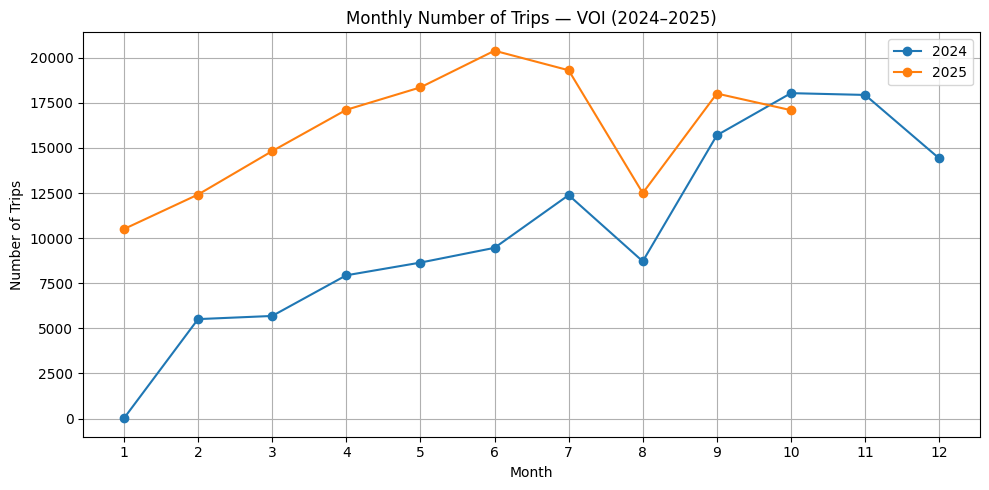

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(
    monthly_2024["month"],
    monthly_2024["num_trips"],
    marker="o",
    label="2024"
)

plt.plot(
    monthly_2025["month"],
    monthly_2025["num_trips"],
    marker="o",
    label="2025"
)

plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Monthly Number of Trips — VOI (2024–2025)")
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [70]:
monthly_trips_pivot = monthly_trips.pivot(
    index="month",
    columns="year",
    values="num_trips"
)

monthly_trips_pivot


year,2024.0,2025.0
month,,
1.0,10.0,10505.0
2.0,5512.0,12419.0
3.0,5687.0,14827.0
4.0,7941.0,17117.0
5.0,8646.0,18361.0
6.0,9464.0,20394.0
7.0,12388.0,19311.0
8.0,8716.0,12501.0
9.0,15706.0,18019.0


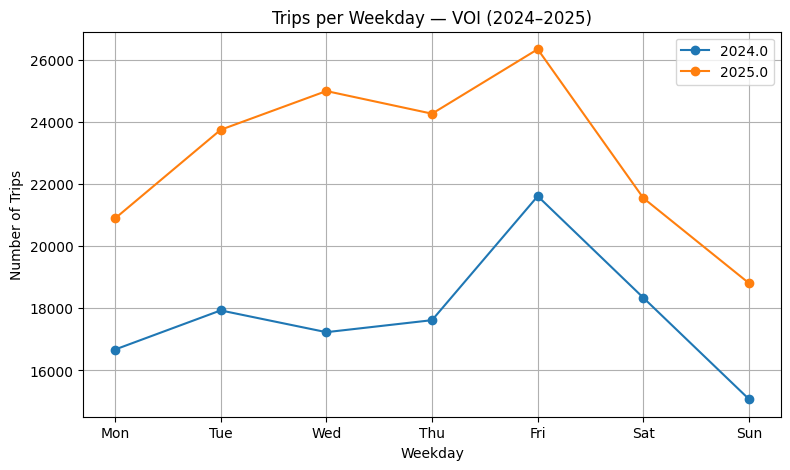

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

weekday_counts = (
    voi_df
    .groupby(["year", "weekday"])
    .size()
    .reset_index(name="trips")
)

weekday_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

plt.figure(figsize=(9,5))

for year in sorted(weekday_counts["year"].unique()):
    data = weekday_counts[weekday_counts["year"] == year]
    plt.plot(
        data["weekday"],
        data["trips"],
        marker="o",
        label=str(year)
    )

plt.xticks(range(7), weekday_labels)
plt.xlabel("Weekday")
plt.ylabel("Number of Trips")
plt.title("Trips per Weekday — VOI (2024–2025)")
plt.legend()
plt.grid(True)
plt.show()


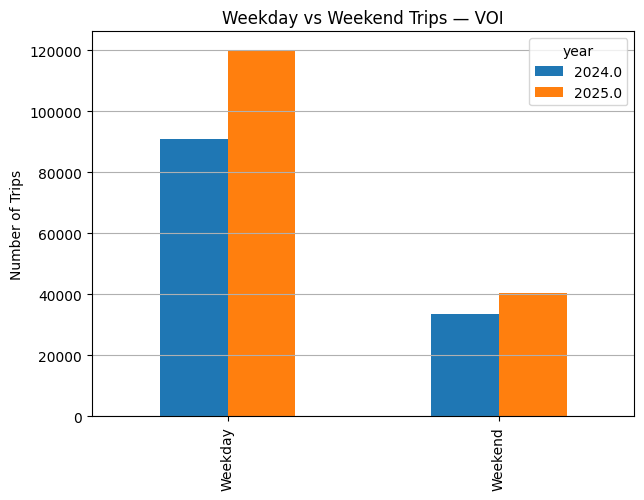

In [72]:
daytype_counts = (
    voi_df
    .groupby(["year", "is_weekend"])
    .size()
    .reset_index(name="trips")
)

daytype_counts["day_type"] = daytype_counts["is_weekend"].map(
    {False: "Weekday", True: "Weekend"}
)

pivot_daytype = daytype_counts.pivot(
    index="day_type",
    columns="year",
    values="trips"
)

pivot_daytype.plot(
    kind="bar",
    figsize=(7,5)
)

plt.xlabel("")
plt.ylabel("Number of Trips")
plt.title("Weekday vs Weekend Trips — VOI")
plt.grid(axis="y")
plt.show()


In [73]:
voi_df["week"] = pd.to_datetime(voi_df["trip_date"]).dt.isocalendar().week


In [74]:
voi_df["week"] = pd.to_datetime(
    voi_df["trip_date"],
    errors="coerce"
).dt.isocalendar().week


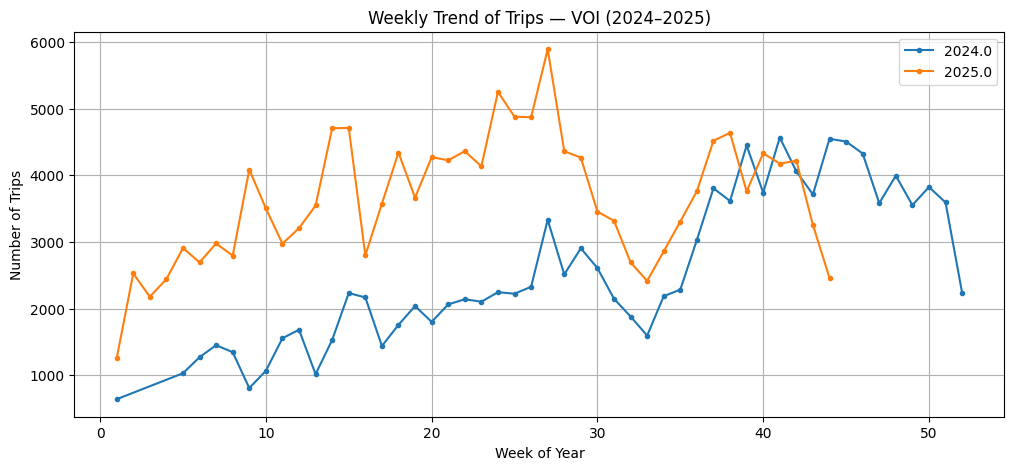

In [75]:
weekly_trips = (
    voi_df
    .groupby(["year", "week"])
    .size()
    .reset_index(name="trips")
)

plt.figure(figsize=(12,5))

for year in sorted(weekly_trips["year"].unique()):
    data = weekly_trips[weekly_trips["year"] == year]
    plt.plot(
        data["week"],
        data["trips"],
        marker=".",
        label=str(year)
    )

plt.xlabel("Week of Year")
plt.ylabel("Number of Trips")
plt.title("Weekly Trend of Trips — VOI (2024–2025)")
plt.legend()
plt.grid(True)
plt.show()


In [76]:
unique_vehicles_year = (
    voi_df
    .groupby("year")["Targa veicolo"]
    .nunique()
    .reset_index(name="unique_vehicles")
)

unique_vehicles_year


,year,unique_vehicles
0,2024.0,1174
1,2025.0,1107


In [77]:
trips_per_year = (
    voi_df
    .groupby("year")
    .size()
    .reset_index(name="total_trips")
)

vehicle_intensity = trips_per_year.merge(
    unique_vehicles_year, on="year"
)

vehicle_intensity["trips_per_vehicle"] = (
    vehicle_intensity["total_trips"] /
    vehicle_intensity["unique_vehicles"]
)

vehicle_intensity


,year,total_trips,unique_vehicles,trips_per_vehicle
0,2024.0,124474,1174,106.025554
1,2025.0,160551,1107,145.032520


In [78]:
vehicles_by_weekday = (
    voi_df
    .groupby(["year", "is_weekend"])["Targa veicolo"]
    .nunique()
    .reset_index(name="unique_vehicles")
)

vehicles_by_weekday


,year,is_weekend,unique_vehicles
0,2024.0,False,1168
1,2024.0,True,1151
2,2025.0,False,1102
3,2025.0,True,1085


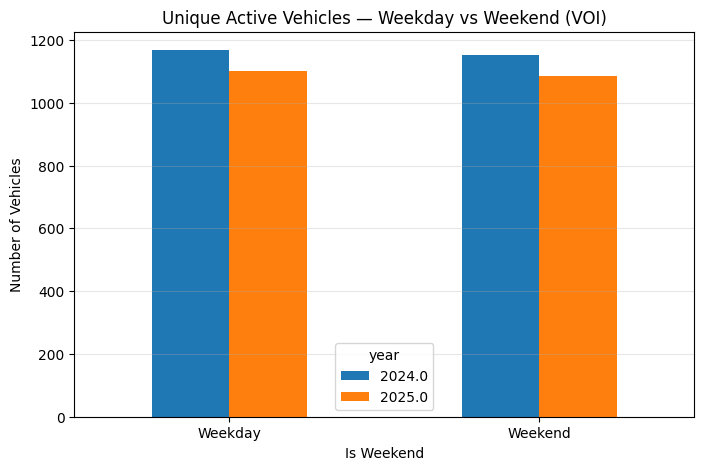

In [79]:
import matplotlib.pyplot as plt

pivot_weekday = vehicles_by_weekday.pivot(
    index="is_weekend",
    columns="year",
    values="unique_vehicles"
)

pivot_weekday.plot(
    kind="bar",
    figsize=(8,5)
)

plt.title("Unique Active Vehicles — Weekday vs Weekend (VOI)")
plt.xlabel("Is Weekend")
plt.ylabel("Number of Vehicles")
plt.xticks([0,1], ["Weekday", "Weekend"], rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.show()


In [80]:
vehicles_by_month = (
    voi_df
    .groupby(["year", "month"])["Targa veicolo"]
    .nunique()
    .reset_index(name="unique_vehicles")
)


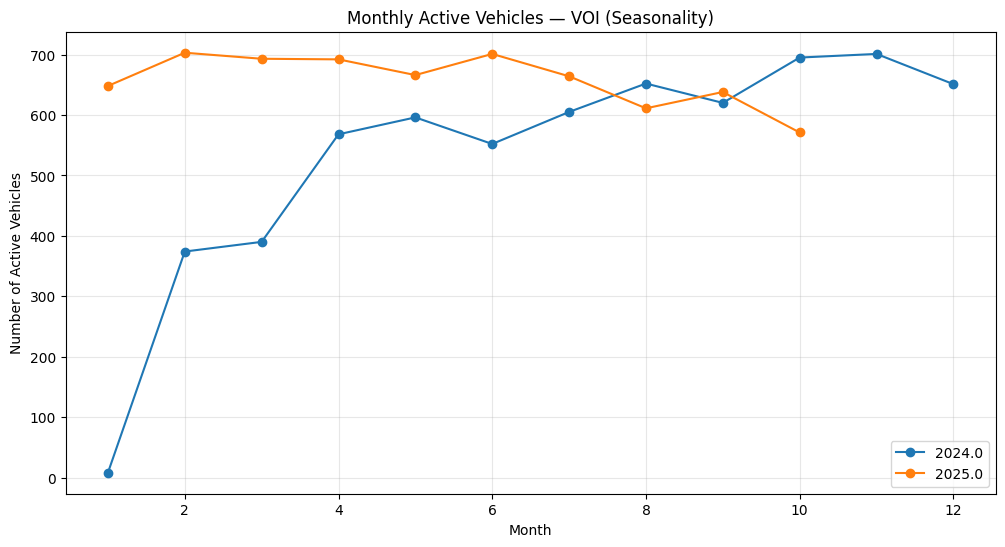

In [81]:
plt.figure(figsize=(12,6))

for year in vehicles_by_month["year"].unique():
    subset = vehicles_by_month[vehicles_by_month["year"] == year]
    plt.plot(
        subset["month"],
        subset["unique_vehicles"],
        marker="o",
        label=str(year)
    )

plt.title("Monthly Active Vehicles — VOI (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Number of Active Vehicles")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [82]:
import matplotlib.pyplot as plt

# 1. Count number of trips per vehicle
trips_per_vehicle = (
    voi_df
    .groupby("Targa veicolo")
    .size()
    .reset_index(name="num_trips")
)

# Quick sanity check
trips_per_vehicle.describe()


,num_trips
count,1445.000000
mean,201.486505
std,158.278684
min,1.000000
25%,84.000000
50%,174.000000
75%,289.000000
max,2082.000000


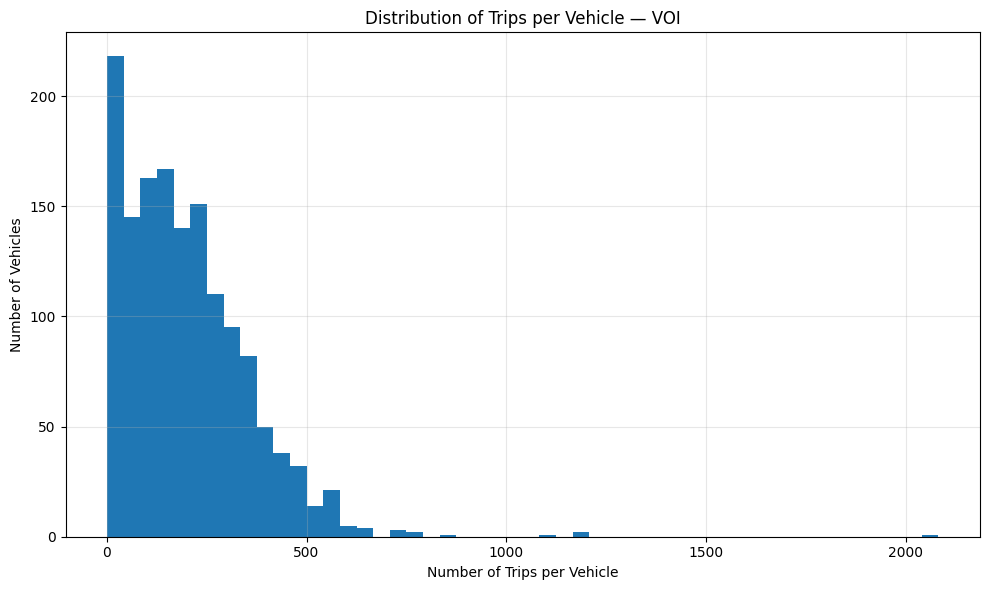

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(trips_per_vehicle["num_trips"], bins=50)
plt.xlabel("Number of Trips per Vehicle")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of Trips per Vehicle — VOI")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


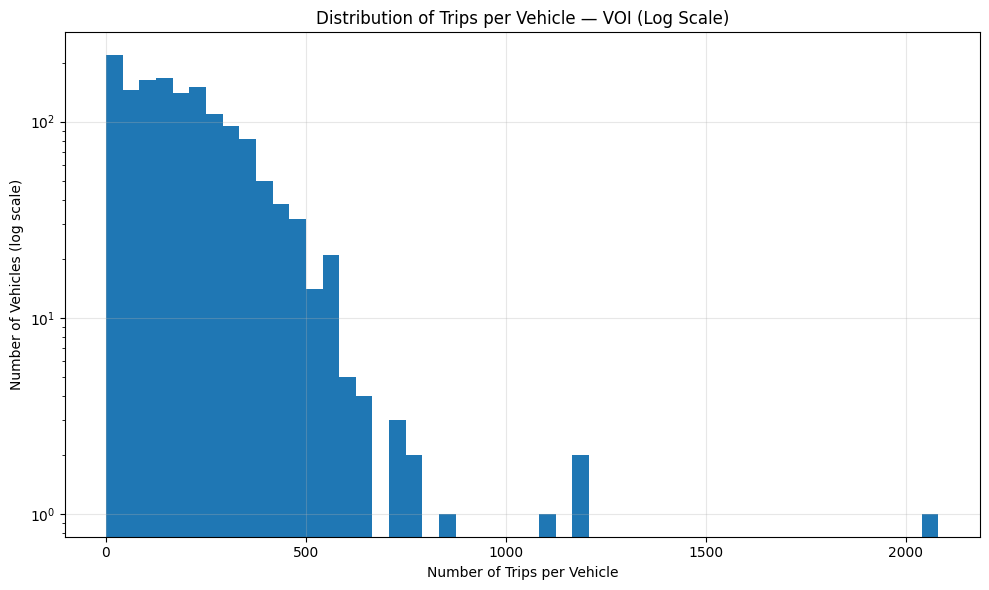

In [84]:
plt.figure(figsize=(10, 6))
plt.hist(trips_per_vehicle["num_trips"], bins=50, log=True)
plt.xlabel("Number of Trips per Vehicle")
plt.ylabel("Number of Vehicles (log scale)")
plt.title("Distribution of Trips per Vehicle — VOI (Log Scale)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [85]:
trips_per_vehicle["num_trips"].quantile([0.25, 0.5, 0.75, 0.9, 0.95])


0.25     84.0
0.50    174.0
0.75    289.0
0.90    398.0
0.95    469.4
Name: num_trips, dtype: float64

In [86]:
voi_df.to_csv("/Users/mina/Desktop/df_all_voi.csv", index=False)
